In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# STEP BY STEP ANALYSIS OF A TIME SERIES DATA


In [3]:
df = pd.read_csv('C:/Users/DELL/Downloads/archive (3)/Month_Value_1.csv',parse_dates=['Period'], dayfirst=True)
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
1,2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2,2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
3,2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
4,2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


In [4]:
df.set_index('Period', inplace=True)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,64.0,3.236045e+07,1.164150e+07,1.402148e+07,2.242655e+07,3.209088e+07,3.992999e+07,5.875647e+07
Sales_quantity,64.0,1.919738e+04,6.591287e+03,8.314000e+03,1.506550e+04,1.836800e+04,2.285625e+04,3.806900e+04
Average_cost,64.0,1.695061e+03,2.968448e+02,1.110577e+03,1.499143e+03,1.654400e+03,1.916401e+03,2.559328e+03
The_average_annual_payroll_of_the_region,64.0,2.869083e+07,1.057191e+06,2.740647e+07,2.782857e+07,2.819785e+07,2.987852e+07,3.002468e+07


In [6]:
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


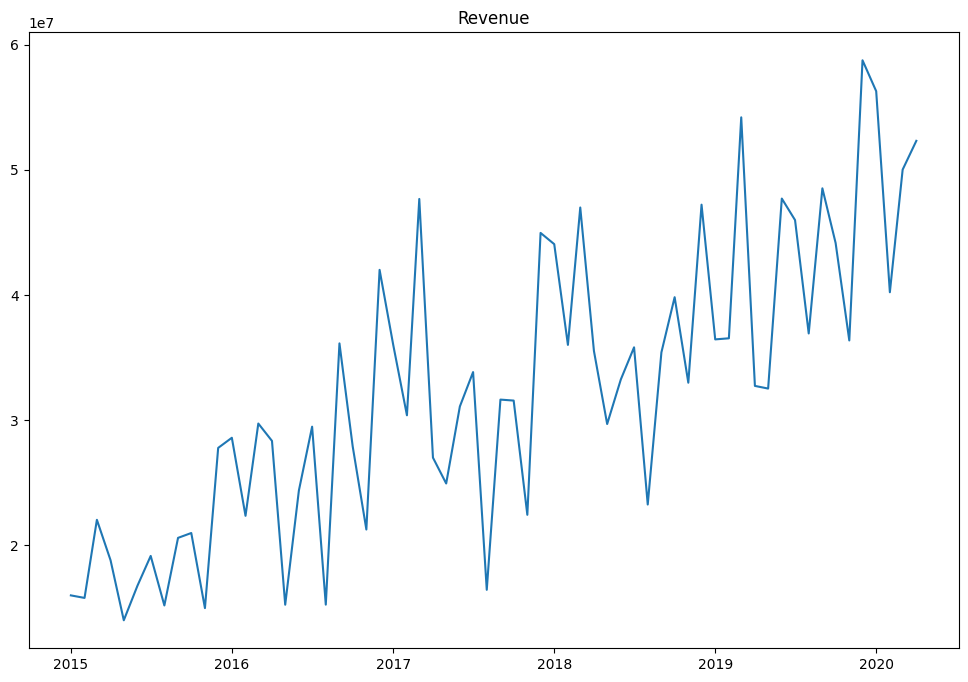

In [8]:
plt.figure(figsize=(12,8))
plt.plot(df['Revenue'])
plt.title('Revenue')
plt.show()

In [9]:
df['Revenue'].fillna(method='ffill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_980\2944918595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Revenue'].fillna(method='ffill', inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_980\2944918595.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Revenue'].fillna(method='ffill', inplace=True)


In [10]:
## CHECK IF DATA IS STATIONARY
# Ho : not stationary
# H1: stationsry

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
adf_test(df['Revenue'])


ADF Statistic: -1.7068549867582024
p-value: 0.4275840874243615


In [11]:
#Since the data is non-stationary, we Transfrom data
# Differencing the data 
df['Revenue_diff'] = df['Revenue'].diff().dropna()

# Check stationarity again
adf_test(df['Revenue_diff'].dropna())

ADF Statistic: -3.4634426091955395
p-value: 0.008977127095540193


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   96 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
 4   Revenue_diff                              95 non-null     float64
dtypes: float64(5)
memory usage: 4.5 KB


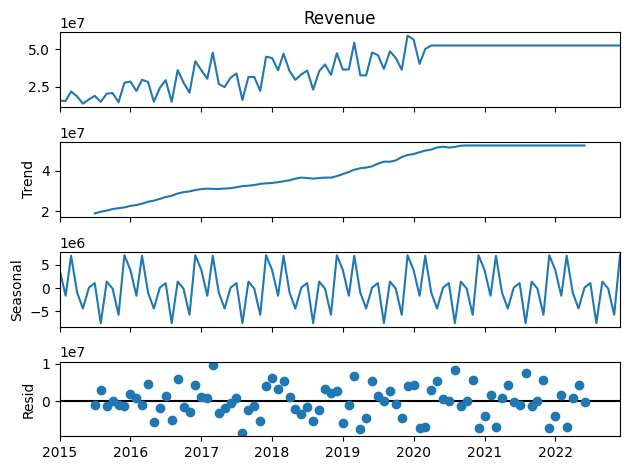

In [13]:
#Now that data is stationary, we DECOMPOSE THE TIME SERIES
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Revenue'], model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
# Fit the SARIMA model
model = SARIMAX(df['Revenue'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Display model summary
print(results.summary())

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1410.438
Date:                            Mon, 20 Jan 2025   AIC                           2830.876
Time:                                    17:24:04   BIC                           2842.970
Sample:                                01-01-2015   HQIC                          2835.734
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0002      0.207      0.001      0.999      -0.406       0.406
ma.L1         -0.7275      0.178   

In [15]:
# from the summary, the model does did not account for some vital elements, like the ARs(since their p-values are not significant)

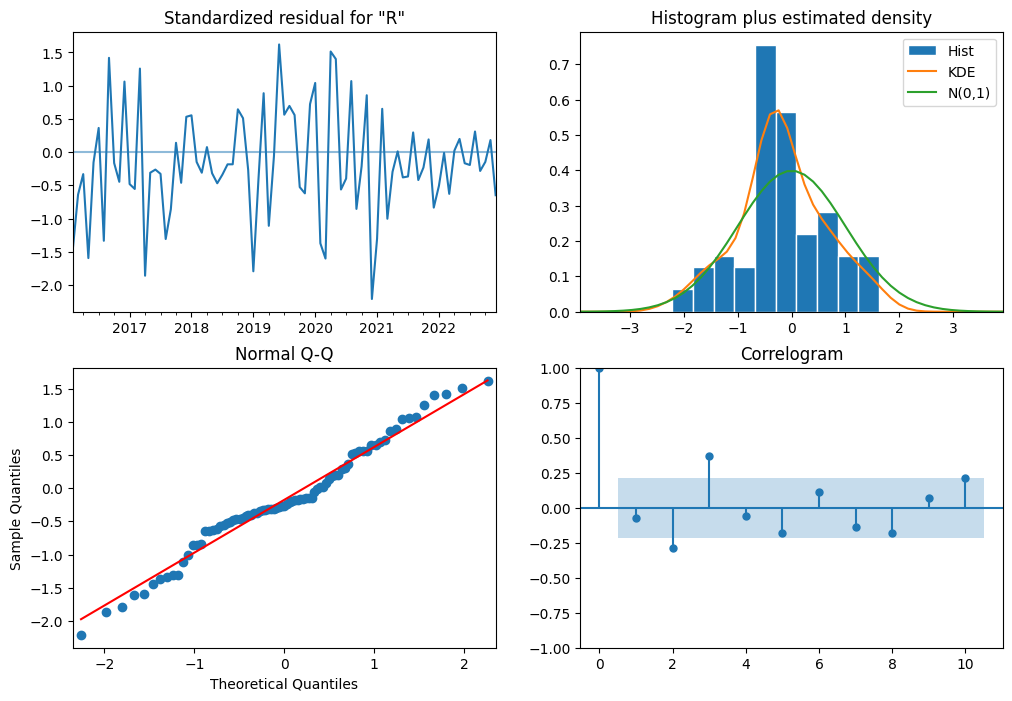

In [16]:
results.plot_diagnostics(figsize=(12, 8))
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_980\3664052747.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')


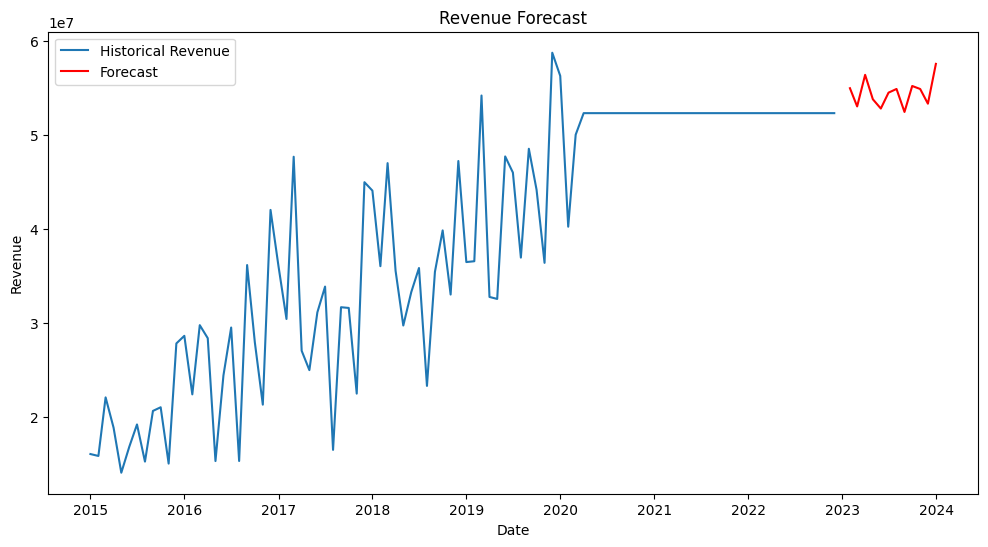

In [17]:
# Forecasting the next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='M')
forecast_values = forecast.predicted_mean

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Revenue'], label='Historical Revenue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()